### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

Para ello vamos a utilizar un conjunto de datos provenientes de un estudio de granos pertenecientes a distintas variedades de trigo. Los atributos de los datos provienen de una visualización de alta calidad de la estructura interna del grano utilizando una técnica de rayos X suaves. La ventaja de esta técnica es que no es destructiva y es considerablemente más económica que otras técnicas de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se registraron en placas KODAK de rayos X de 13x18 cm. Los estudios se llevaron a cabo utilizando grano de trigo cosechado en combinación procedente de campos experimentales, explorados en el Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin.


Los atributos observados son seis parámetros geométricos medidos en los granos de trigo:

V1: área A

V2: perímetro P

V3: longitud de la semilla

V4: ancho de la semilla

V5: coeficiente de asimetría

V6: longitud de la ranura de la semilla

Se trata de analizar de que manera estos atributos permiten generar grupos en los datos que correspondan idealmente a cada variedad de trigo disponible en los datos.

      V1    V2    V3    V4    V5    V6
1  16.63 15.46 6.053 3.465 2.040 5.877
2  20.03 16.90 6.493 3.857 3.063 6.320
3  15.60 15.11 5.832 3.286 2.725 5.752
4  10.82 12.83 5.180 2.630 4.853 5.089
5  14.79 14.52 5.545 3.291 2.704 5.111
6  14.03 14.16 5.438 3.201 1.717 5.001
7  16.44 15.25 5.884 3.505 1.969 5.533
8  13.78 14.06 5.479 3.156 3.136 4.872
9  18.76 16.20 6.172 3.796 3.120 6.053
10 12.88 13.50 5.139 3.119 2.352 4.607


       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

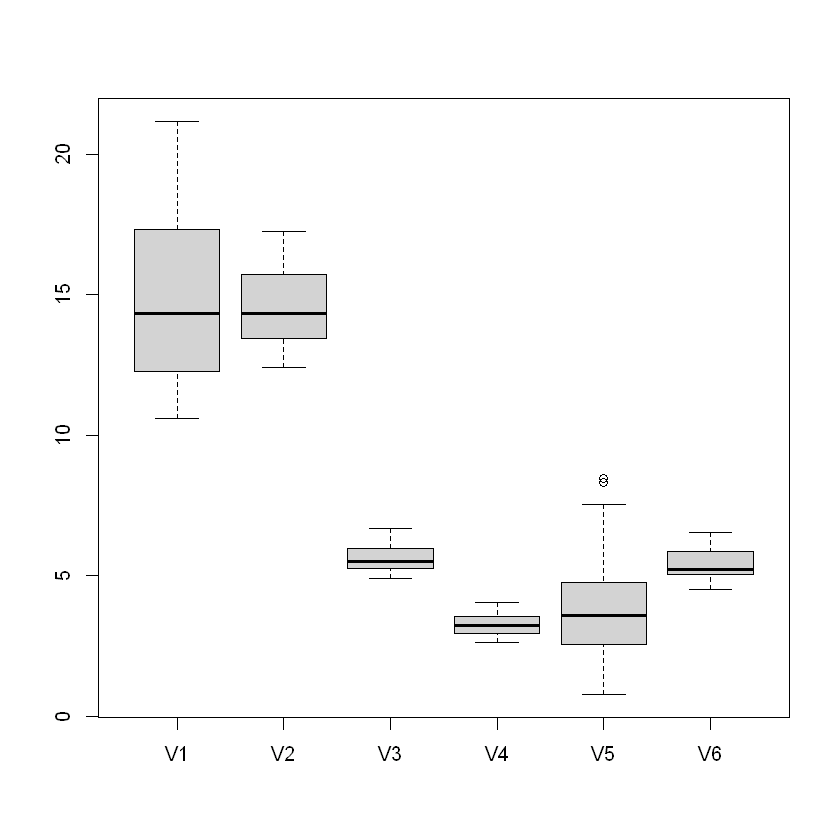

In [2]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")

print(datos[1:10,])
summary(datos)
boxplot(datos)

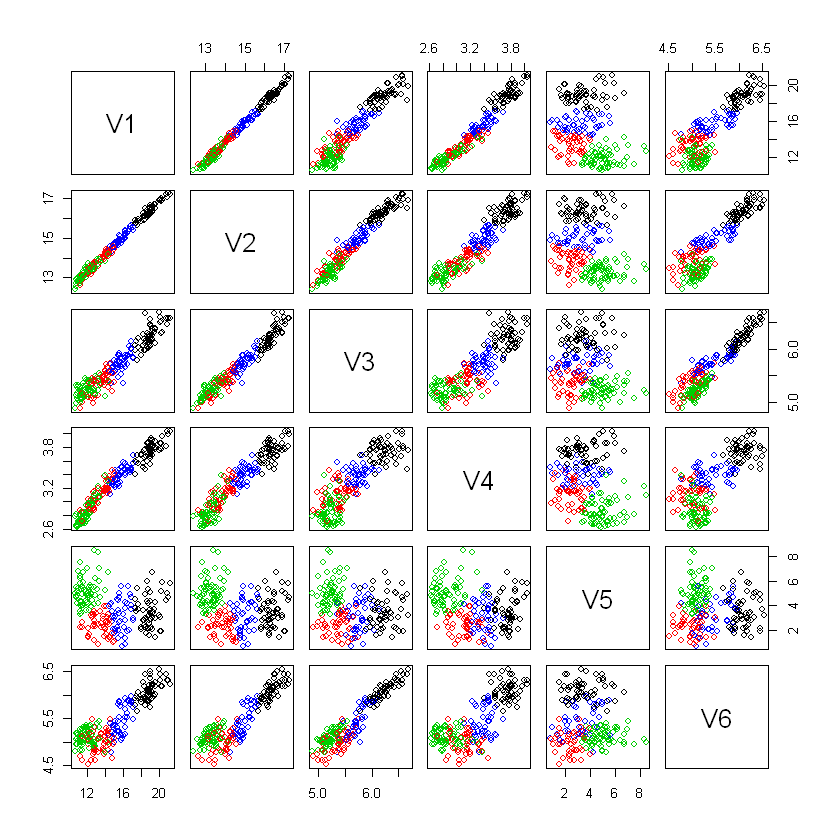

In [2]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Al considerar 2,3 o 4 grupos con el algoritmo KMeans, se obtienen grupos bastante bien diferenciados por las variables area, perimetro longitud de las semillas. Las tres últimas variables tienen valores con mayor nivel de confusión entre los grupos definidos por kmeans.

In [4]:
help(princomp)

princomp                 package:stats                 R Documentation

_P_r_i_n_c_i_p_a_l _C_o_m_p_o_n_e_n_t_s _A_n_a_l_y_s_i_s

_D_e_s_c_r_i_p_t_i_o_n:

     'princomp' performs a principal components analysis on the given
     numeric data matrix and returns the results as an object of class
     'princomp'.

_U_s_a_g_e:

     princomp(x, ...)
     
     ## S3 method for class 'formula'
     princomp(formula, data = NULL, subset, na.action, ...)
     
     ## Default S3 method:
     princomp(x, cor = FALSE, scores = TRUE, covmat = NULL,
              subset = rep_len(TRUE, nrow(as.matrix(x))), fix_sign = TRUE, ...)
     
     ## S3 method for class 'princomp'
     predict(object, newdata, ...)
     
_A_r_g_u_m_e_n_t_s:

 formula: a formula with no response variable, referring only to
          numeric variables.

    data: an optional data frame (or similar: see 'model.frame')
          containing the variables in the formula 'form


Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
V1  0.458         0.232         0.378  0.770
V2  0.460                0.231  0.611 -0.597
V3  0.450        -0.291  0.676 -0.496       
V4  0.435         0.638 -0.343 -0.485 -0.213
V5 -0.108 -0.963  0.235                     
V6  0.419 -0.248 -0.627 -0.606              

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.167  0.167  0.167  0.167  0.167  0.167
Cumulative Var  0.167  0.333  0.500  0.667  0.833  1.000

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.


ERROR: Error: objeto 'cl' no encontrado


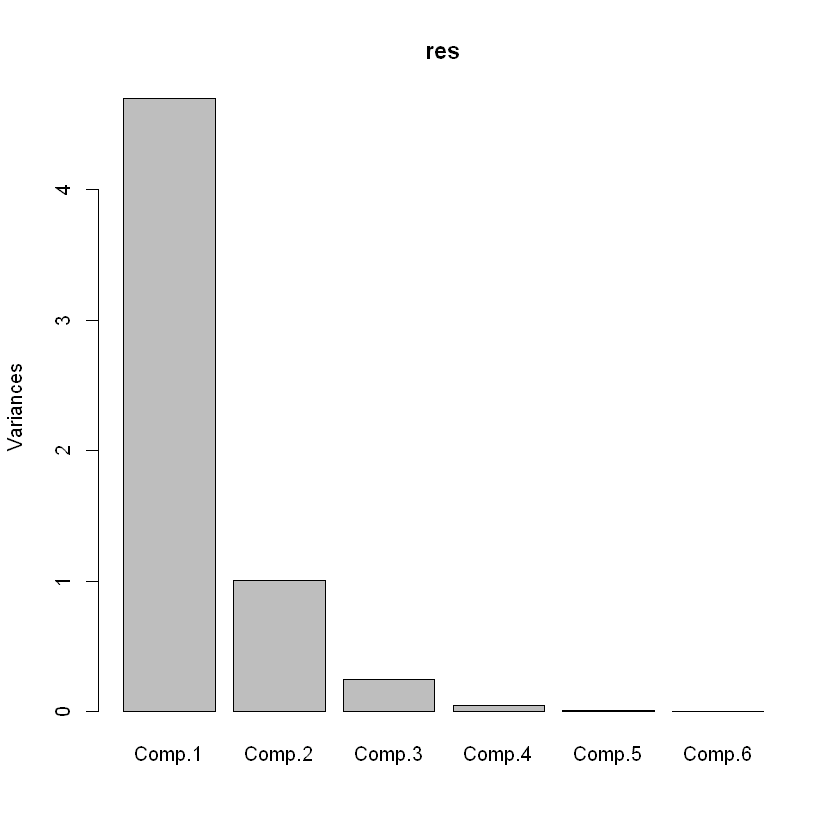

In [5]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res$loadings
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


La representación de los grupos en el primer plano principal nos permite distinguir que el grupo 2 representa a las semillas con mayores valores de todas las variables excepto V5, el coeficiente de simetría. El grupo 1 representa las semillas con valores intermendios de las distintas variables  y los grupos 3 y 4 con los menores valores. Se distinguen el grupo 3 del 4 por sus mayores valores de V5 el coeficiente de simetría. 


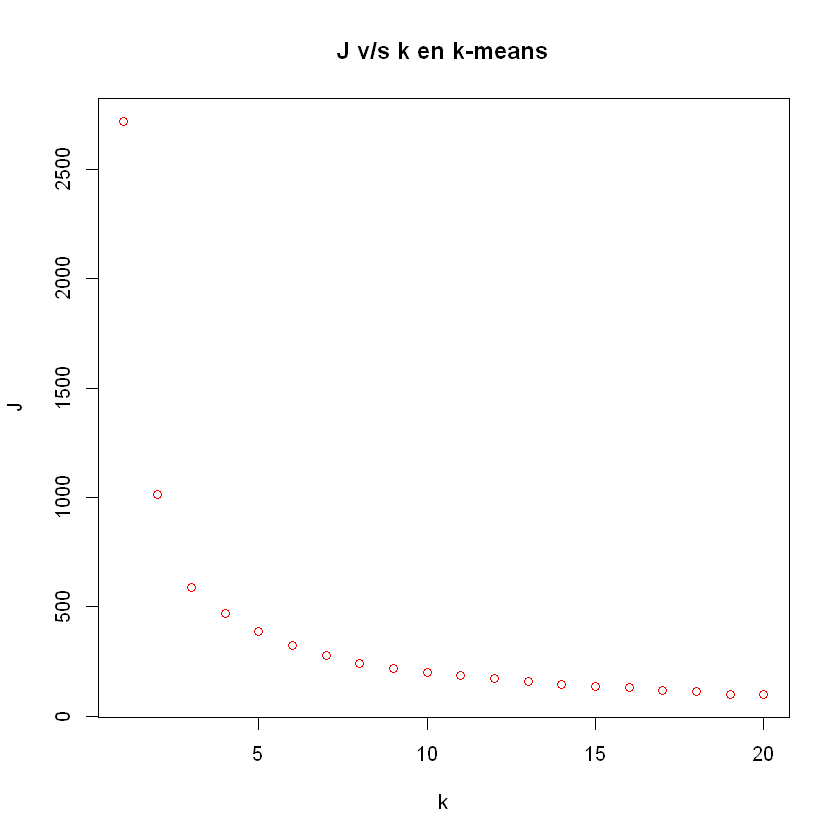

In [3]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

### Ejercicio 1:

1. De acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Explique su decisión.
2. Realice nuevamente los cálculos con el K óptimo y  caracterice los grupos obtenidos. Interprete sus resultados

### 1.1)

Según el gráfico de J vs. K, el valor más apropiado para K es 3, ya que a partir de ese punto la disminución en la suma de cuadrados intra-grupo se vuelve más lenta y estable. Esto indica que el agregar más grupos no mejora significativamente la compactación de los clusters, por lo tanto, K=3 logra un buen equilibrio entre simplicidad y agrupamiento efectivo. 

Sin embargo, K = 4 también es aceptable, ya que aún se observa una ligera mejora en la compactación de los grupos. En algunos casos, dependiendo del contexto o de la interpretación deseada, podría preferirse K = 4 si se busca un mayor nivel de detalle en la segmentación.

Para este ejercicio trabajamos con K = 3 K=3 porque logra un buen equilibrio entre simplicidad y agrupamiento efectivo.

### 1.2)


Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
V1  0.458         0.232         0.378  0.770
V2  0.460                0.231  0.611 -0.597
V3  0.450        -0.291  0.676 -0.496       
V4  0.435         0.638 -0.343 -0.485 -0.213
V5 -0.108 -0.963  0.235                     
V6  0.419 -0.248 -0.627 -0.606              

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.167  0.167  0.167  0.167  0.167  0.167
Cumulative Var  0.167  0.333  0.500  0.667  0.833  1.000

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.


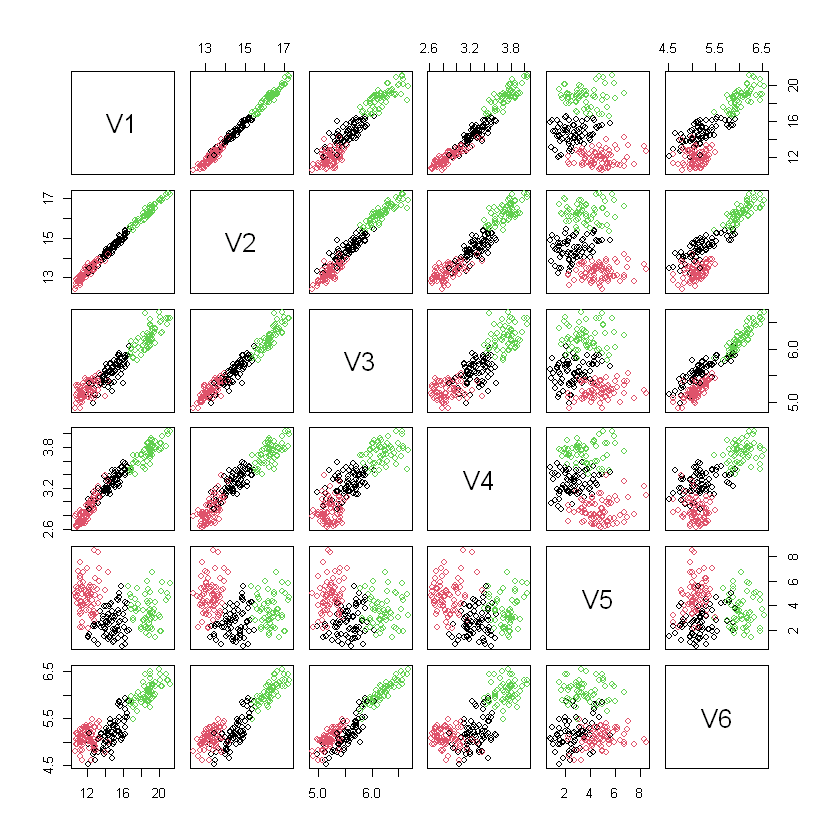

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
1,-0.2189232,0.7985683,0.16423218,0.08015012,-0.010906320,-0.014971476
2,-2.1089388,-0.5304285,-0.12243032,-0.04130075,0.002155313,0.007683248
3,2.9205042,-0.2730151,-0.03930464,-0.04246970,0.010152392,0.007972724


K-means clustering with 3 clusters of sizes 72, 77, 61

Cluster means:
        V1       V2       V3       V4       V5       V6
1 14.64847 14.46042 5.563778 3.277903 2.648931 5.192319
2 11.96442 13.27481 5.229286 2.872922 4.759740 5.088519
3 18.72180 16.29738 6.208934 3.722672 3.603590 6.066098

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   3   1   2   1   1   1   1   3   1   2   1   1   3   3   2   2   1   1   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   3   1   2   2   3   2   1   1   3   1   1   2   1   3   3   3   2   1   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   3   1   2   3   3   2   2   2   3   2   1   2   1   1   3   1   3   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   3   2   1   3   1   3   1   3   2   3   1   1   3   1   3   1   3   1   3 
 81  82  83  84  85  86  87  88  89  

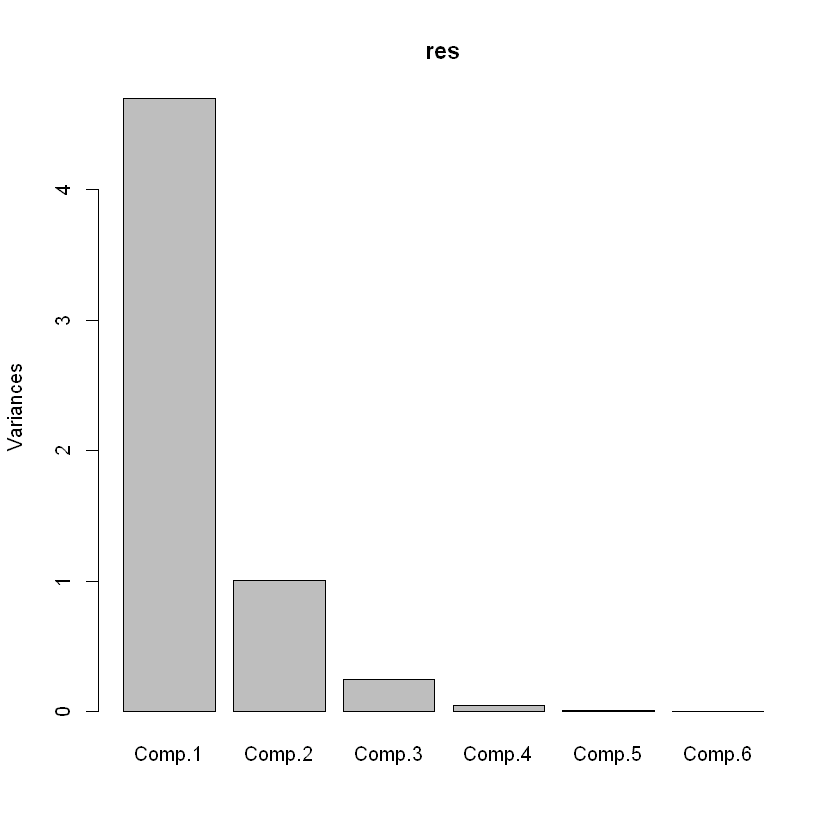

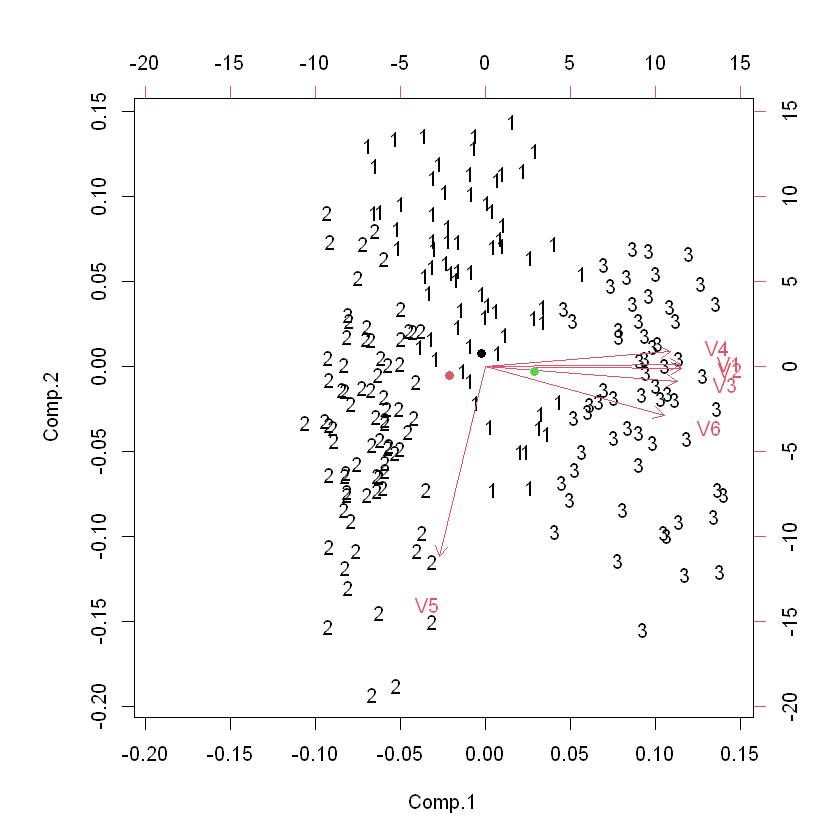

In [3]:
#ingresar valor de k
k=3
cl<-kmeans(datos,k,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res$loadings
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k,pch=19)

Se aplicó nuevamente el algoritmo k-means con k = 3. Los resultados obtenidos muestran lo siguiente:

En el gráfico de pares de variables (pairs()), los grupos se distinguen claramente en varias combinaciones de variables. Las observaciones se agrupan de forma consistente, lo que indica una buena segmentación.
En el gráfico de Componentes Principales (biplot), los tres grupos aparecen bien diferenciados. Esto refuerza la validez de la clasificación obtenida.
Las variables que más contribuyen a la separación de los grupos son V4, V5 y V6, como puede observarse en las direcciones de las flechas del biplot (estas variables tienen mayor peso en los componentes principales).

Interpretación:

El algoritmo identificó 3 grupos naturales en los datos, cada uno con características propias.
Las observaciones dentro de cada grupo comparten patrones similares, y se distinguen claramente de los otros grupos.
Utilizar K = 3 permite capturar adecuadamente la estructura subyacente de los datos sin caer en una segmentación excesiva.

## Otras alternativas de cálculo

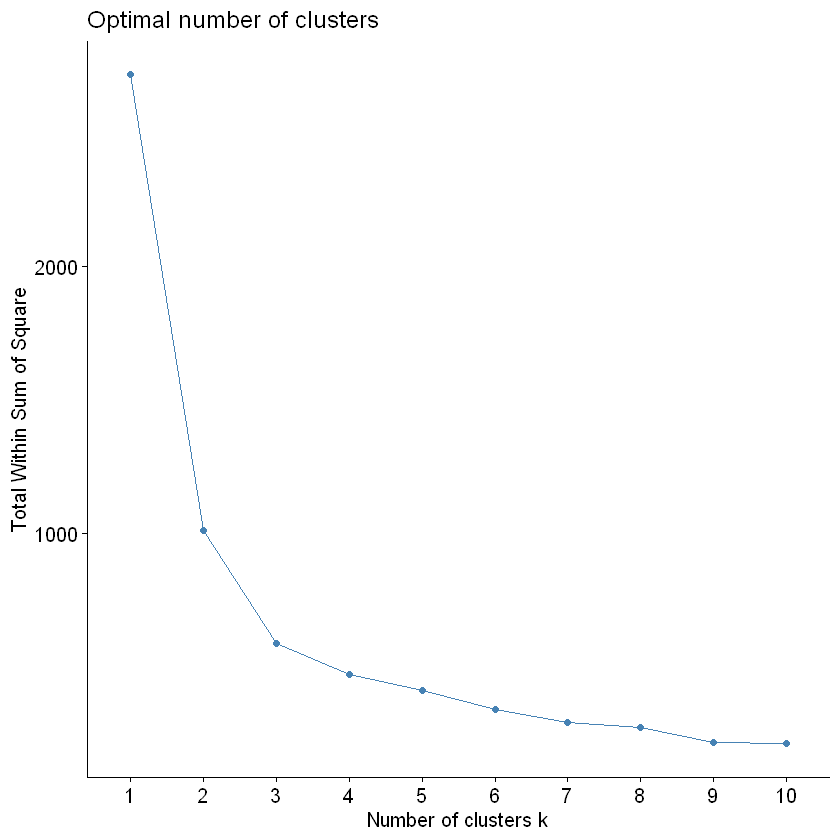

In [10]:
library(cluster)
library(factoextra)
df <- data.frame(datos)
fviz_nbclust(df, kmeans, method = "wss")


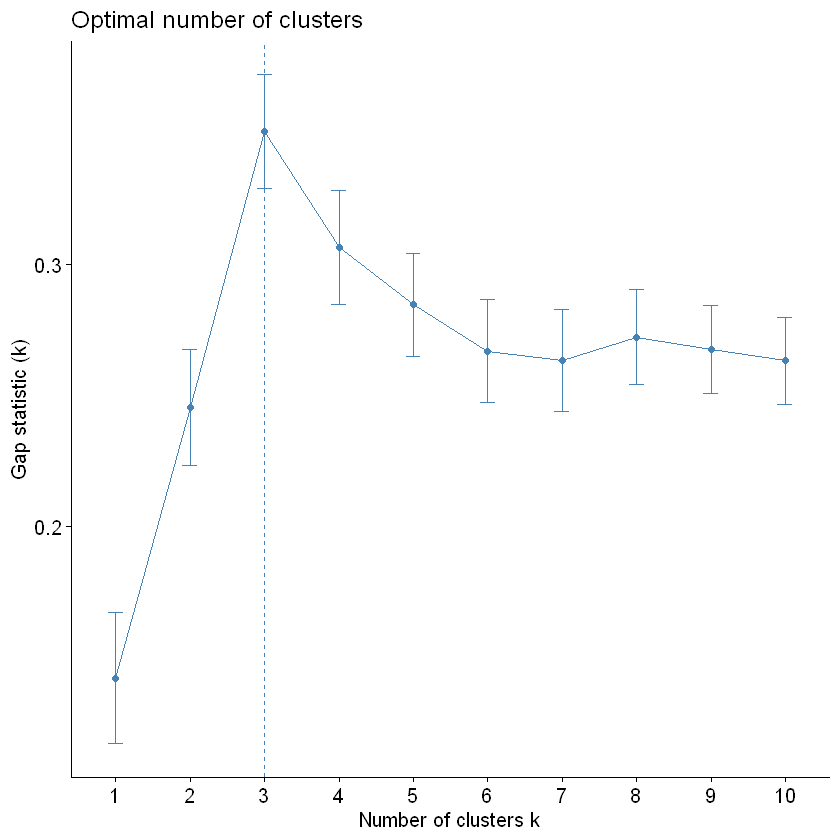

In [11]:
#calculo de gap estadístico basado en el número de grupos: 
#tasa entre la suma de distancias intragrupos con k grupos y con un sólo un grupo
gap_stat <- clusGap(df,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)


fviz_gap_stat(gap_stat)

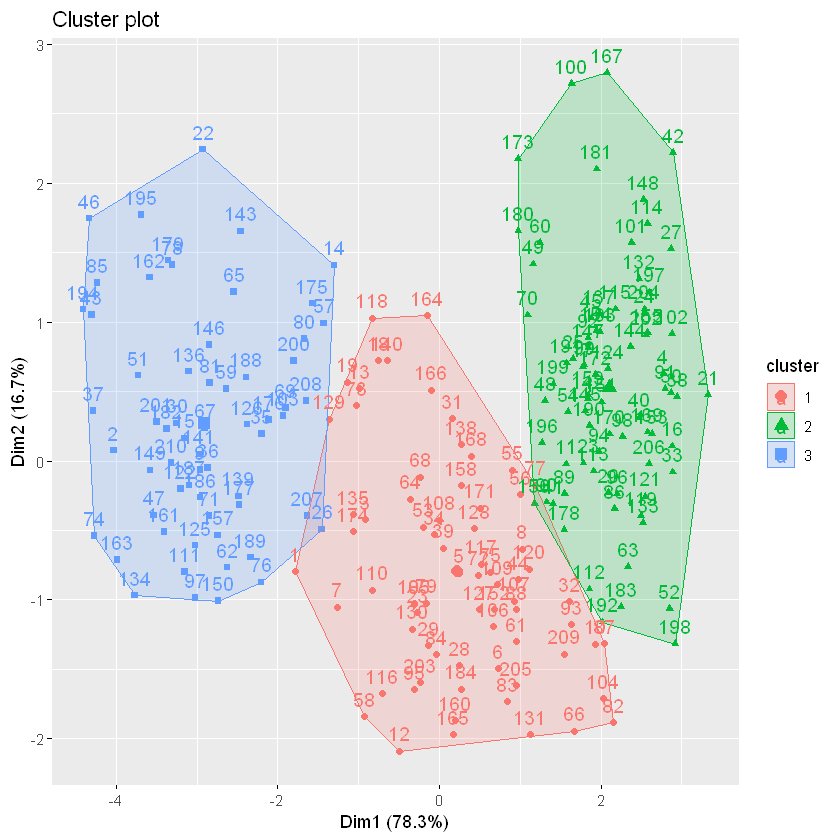

In [12]:
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
fviz_cluster(cl, df)

### Ejercicio 2:
Realice un análisis de clustering con las 11 características (correspondiente a las columnas 4 a la 14)  en el archivo tiposMusica.csv. Si es necesario, filtre sus datos considerando las conclusiones del análisis exploratorio de la tarea de PCA.

1. Describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento
2. Utilice k-means para realizar el clustering de los datos y calcule el K óptimo. 
3. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados


In [9]:
datosC <- read.csv("..//data//tiposMusica.csv",header=TRUE,sep=";",dec=".")

In [10]:
datosC[1:10,4:14]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14,0.942,0.350,79333,0.0761,0.00e+00,0.1560,-22.003,0.0352,140.044,0.0293
2,13,0.991,0.236,261000,0.0753,3.15e-03,0.0858,-23.232,0.0426,122.973,0.3000
3,2,0.994,0.240,48000,0.2510,9.58e-01,0.1020,-11.310,0.0394,99.234,0.1600
4,32,0.996,0.387,136293,0.0222,9.22e-01,0.1200,-29.504,0.1400,112.360,0.0687
5,29,0.994,0.358,154147,0.2050,1.45e-05,0.1490,-13.588,0.0430,87.696,0.5180
6,25,0.993,0.470,70987,0.2040,9.15e-01,0.1180,-21.667,0.0653,138.257,0.0398
7,0,0.644,0.415,64760,0.0197,0.00e+00,0.1970,-34.225,0.0369,74.338,0.2280
8,0,0.993,0.380,297372,0.0414,9.23e-01,0.1130,-22.443,0.0350,75.241,0.5470
9,23,0.993,0.332,219947,0.2300,8.72e-01,0.1110,-23.125,0.0620,99.962,0.0356


### 2.1)

Los datos contienen 11 variables numéricas relacionadas con características musicales. Estas variables se dividen en:

Subjetivas: acousticness, danceability, energy, instrumentalness, liveness, speechiness, valence.
Objetivas: duration_ms, tempo, loudness.
Popularidad: popularity, que refleja cuántas veces ha sido reproducida una canción.
Pertinencia del clustering: El análisis de clustering es pertinente porque no hay etiquetas claras como géneros musicales en los datos. Aplicar un algoritmo como K-means puede ayudar a agrupar canciones similares automáticamente, revelando patrones ocultos como estilos o tipos de canciones que no son evidentes a simple vista. Esto puede ser útil para entender mejor las características comunes entre canciones y cómo se relacionan entre sí.


### 2.2)
 ya se cargaron los datos previamente ,luego se utilizo el metodo codo para determinar k optimo:

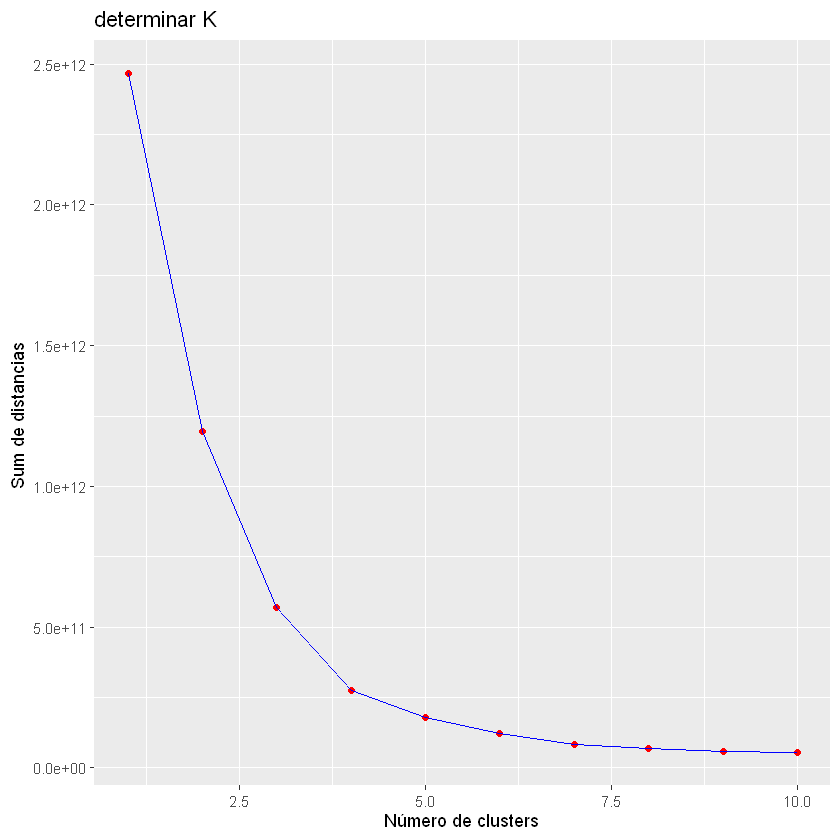

In [24]:
library(ggplot2)


J <- rep(0, 10)  


for (k in 1:10) {  # num maximo de k
  cl <- kmeans(datosC_filtrados, centers = k, iter.max = 1000, nstart = 10)
  J[k] <- cl$tot.withinss
}


df_codo <- data.frame(K = 1:10, SumaDistancias = J)

ggplot(df_codo, aes(x = K, y = SumaDistancias)) +
  geom_point(color = "red") +
  geom_line(color = "blue") +
  labs(title = "determinar K",
       x = "Número de clusters",
       y = "Sum de distancias ")

El gráfico mostró que el valor óptimo de K es 3, ya que en este punto la disminución de la suma de las distancias comienza a estabilizarse.

Finalmente, se aplicó el algoritmo K-means con K = 3:

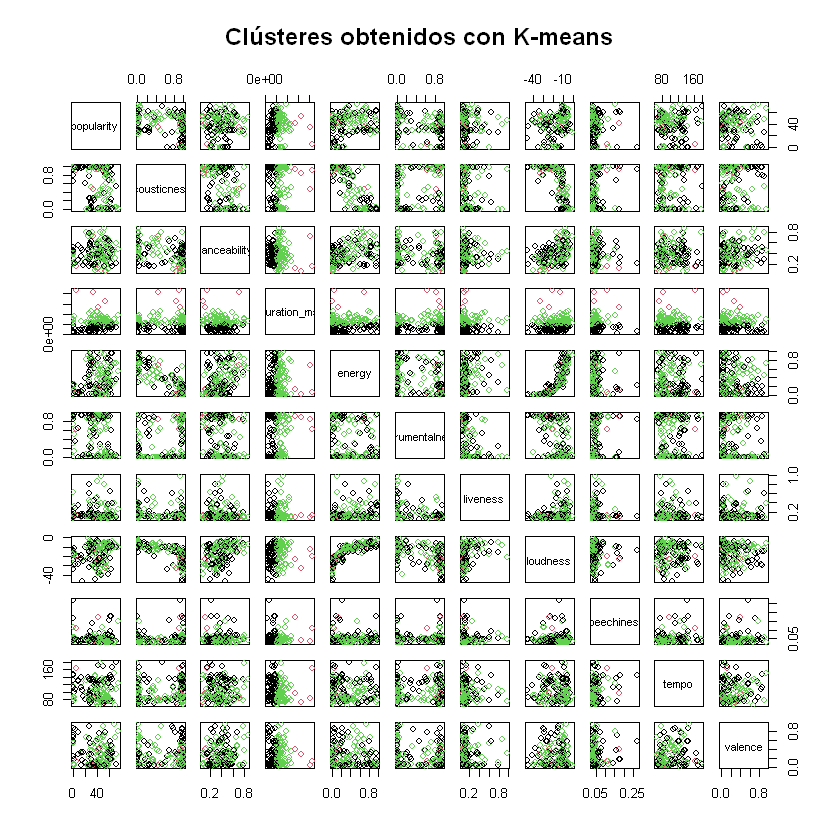

In [ ]:
k_optimo <- 3
cl <- kmeans(datosC_filtrados, centers = k_optimo, iter.max = 1000, nstart = 10)

pairs(datosC_filtrados, col = cl$cluster, main = "Clústeres obtenidos con K-means")

2.3)Para caracterizar los grupos, se calculó las medias de cada variable dentro de cada clúster:

In [23]:
caracteristicas_clusters <- aggregate(datosC_filtrados, by = list(Cluster = cl$cluster), FUN = mean)
print(caracteristicas_clusters)

  Cluster popularity acousticness danceability duration_ms    energy
1       1   34.81538    0.6448506    0.3872154    120044.4 0.3429109
2       2   33.50000    0.7862500    0.2640000    721935.0 0.2240000
3       3   42.36250    0.5724581    0.4033150    274685.9 0.3645029
  instrumentalness  liveness  loudness speechiness    tempo   valence
1        0.4825898 0.1771431 -18.61714  0.05913077 110.4832 0.2835538
2        0.8157500 0.1082500 -22.25375  0.09065000 103.5957 0.2073250
3        0.4058571 0.1838475 -15.67374  0.04720125  96.8046 0.2636050


Interpretación de los resultados:

- Clúster 1: Este grupo tiene valores altos en danceability y valence, lo que sugiere que estas canciones son más bailables y alegres.

- Clúster 2: Este grupo tiene valores altos en instrumentalness y bajos en speechiness, lo que indica que estas canciones son principalmente instrumentales.
- Clúster 3: Este grupo tiene valores altos en energy y loudness, lo que sugiere que estas canciones son más enérgicas y ruidosas.
- Los clusters reflejan similitudes entre las canciones basadas en sus características musicales, lo que podría ser útil para crear listas de reproducción o analizar tendencias musicales.